Generating random numbers using the np.random module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


The np.random module and Bernoulli trials


You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success

In [2]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number=np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success+=1

    return n_success

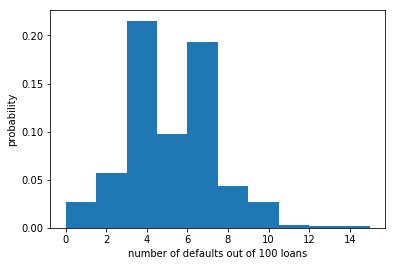

In [3]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults=np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

Will the bank fail?



Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF. The ecdf() function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


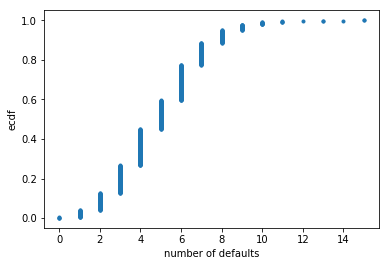

Probability of losing money = 0.022


In [5]:
# Compute ECDF: x, y
x,y=ecdf(n_defaults)

# Plot the ECDF with labeled axes
_=plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('number of defaults')
_=plt.ylabel('ecdf')


# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money=np.sum(n_defaults>=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


Sampling out of the Binomial distribution

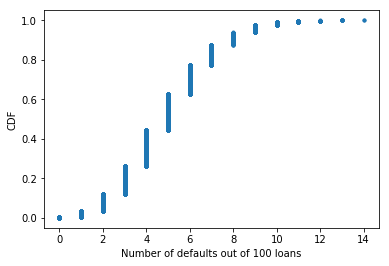

In [6]:
np.random.seed(42)

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults=np.random.binomial(100,0.05,size=10000)

# Compute CDF: x, y
x,y=ecdf(n_defaults)

# Plot the CDF with axis labels
_=plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('Number of defaults out of 100 loans')
_=plt.ylabel('CDF')



# Show the plot
plt.show()


Plotting the Binomial PMF

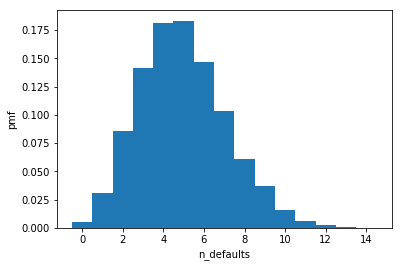

In [7]:
# Compute bin edges: bins
bins = np.arange(0,max(n_defaults) + 1.5) - 0.5

# Generate histogram
_=plt.hist(n_defaults,normed=True,bins=bins)

# Label axes
_=plt.xlabel("n_defaults")
_=plt.ylabel("pmf")

# Show the plot
plt.show()

Relationship between Binomial and Poisson distributions



The Poisson distribution is a limit of the Binomial distribution for rare events.
 So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

In [8]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson=np.random.poisson(10,10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n=[20,100,1000]
p=[0.5,0.1,0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      9.9732 3.1276319732347027
n = 20 Binom: 9.9999 2.243858282066851
n = 100 Binom: 9.9957 2.998346462635698
n = 1000 Binom: 9.997 3.124162447761


Was 2015 anomalous?



1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?



In [10]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters=np.random.poisson(251/115,10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large=n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0057
